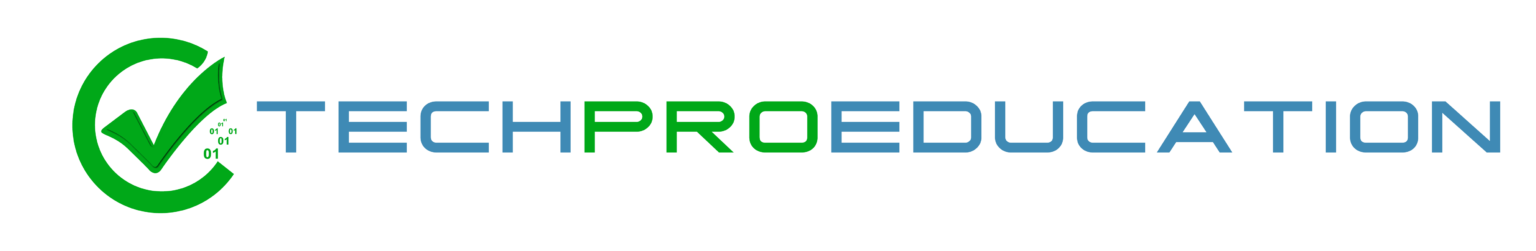

# WELCOME!

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

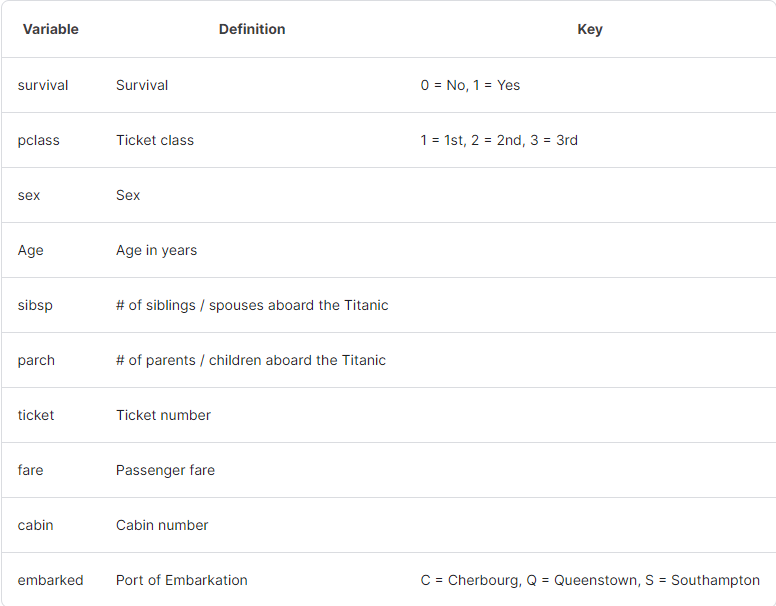

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis and Visualization

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [50]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
train = pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

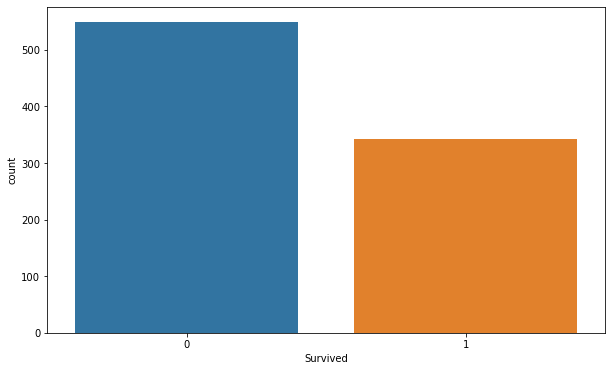

In [54]:
sns.countplot(x= train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

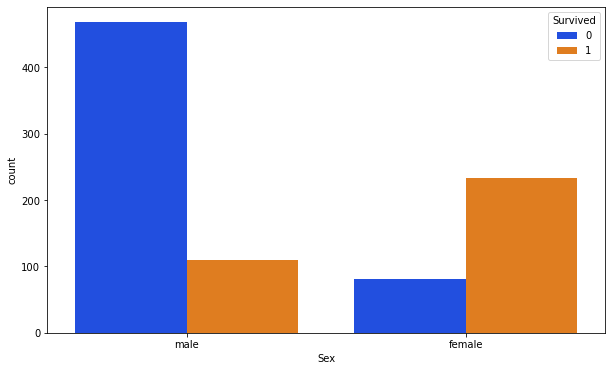

In [55]:
sns.countplot(x='Sex', hue= 'Survived', data=train, palette = 'bright') 

In [56]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


SibSp, Parch, Fare outlier olabilir. Standart deviation daha buyuk mean dan. max ile 75 kisimda da buyuk fark olan SibSp, Parch, Fare.

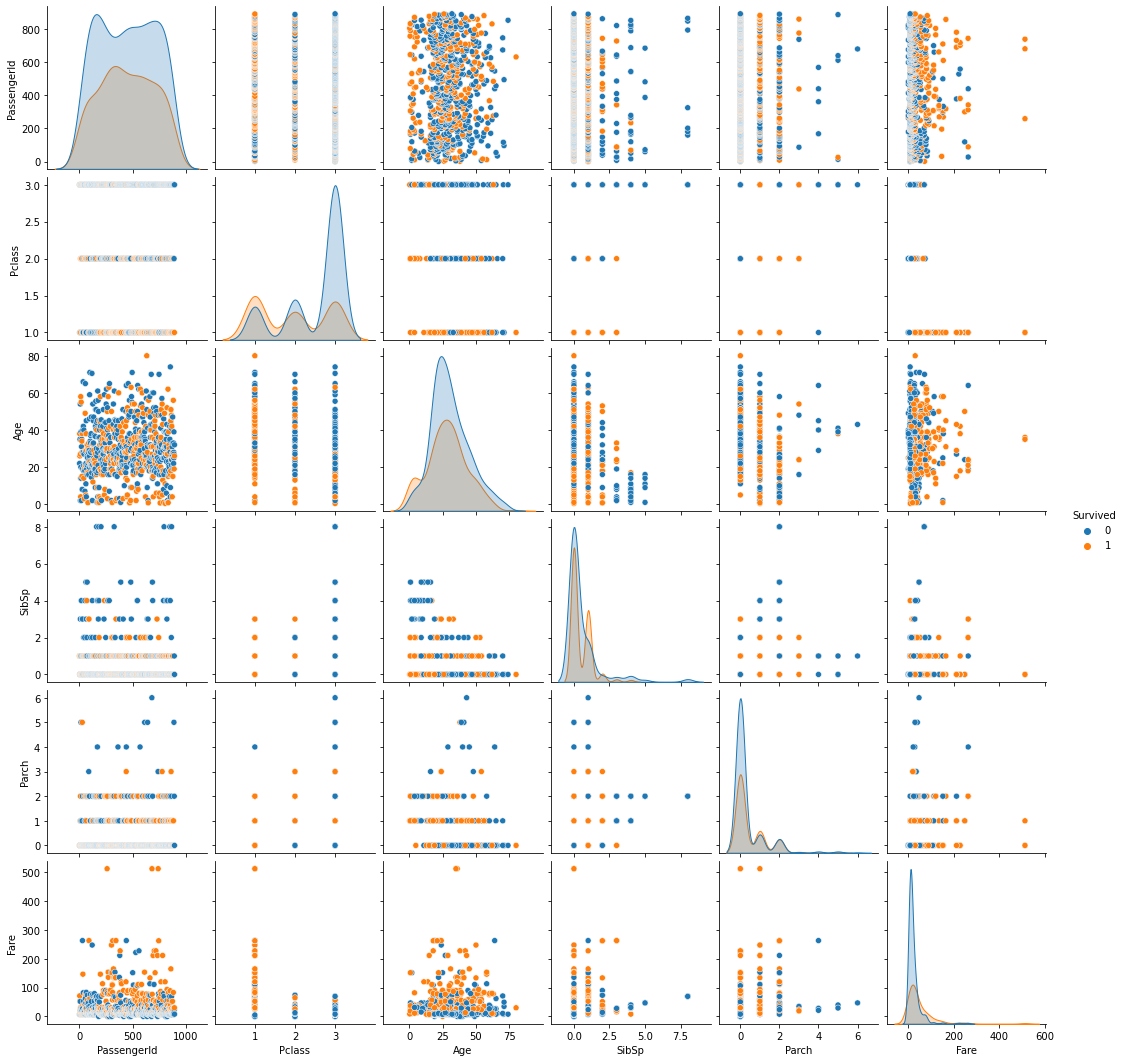

In [57]:
sns.pairplot(train, hue= "Survived");

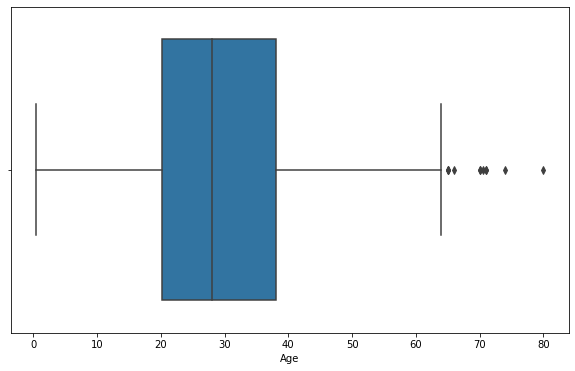

In [105]:
sns.boxplot(train.Age);

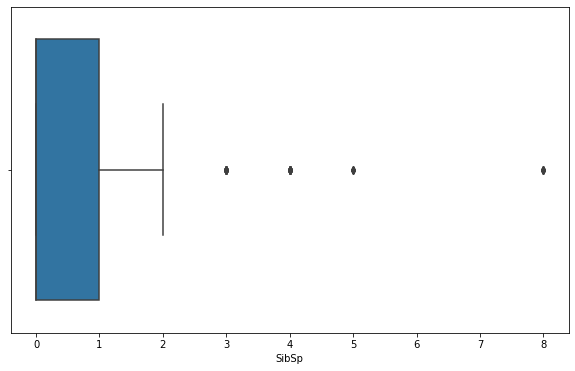

In [140]:
sns.boxplot(train.SibSp);

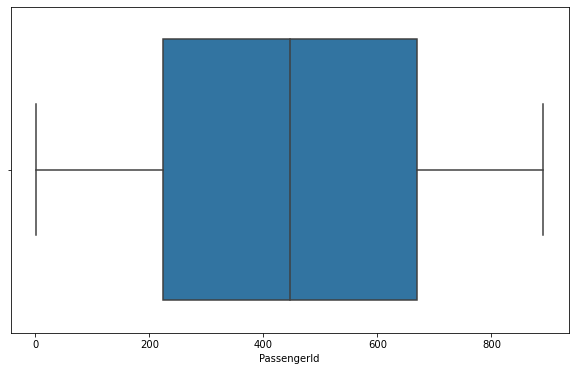

In [107]:
sns.boxplot(train.PassengerId);

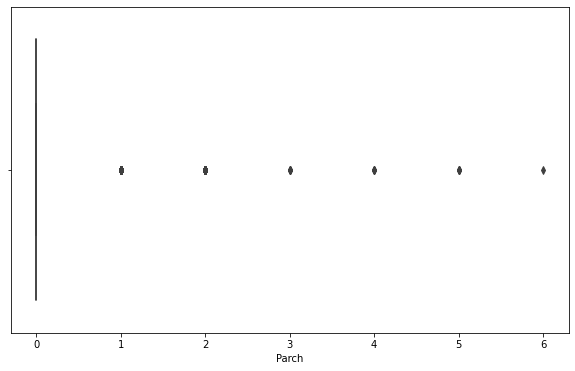

In [108]:
sns.boxplot(train.Parch);

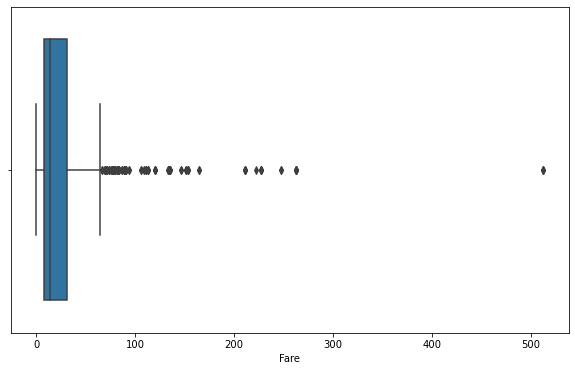

In [109]:
sns.boxplot(train.Fare);

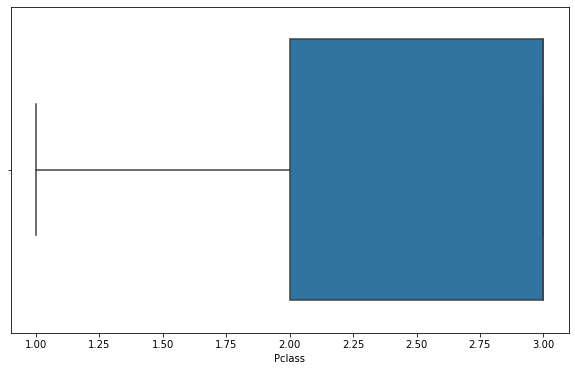

In [110]:
sns.boxplot(train.Pclass);

iyi ayrismiyor. Pclass,PessengerId outlier var.

In [113]:
def summary(train, pred=None):
    obs = train.shape[0]
    Types = train.dtypes
    Counts = train.apply(lambda x: x.count())
    Min = train.min()
    Max = train.max()
    Uniques = train.apply(lambda x: x.unique().shape[0])
    Nulls = train.apply(lambda x: x.isnull().sum())
    print('Data shape:', train.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(train)

Data shape: (891, 11)
___________________________
Data Types:
object     5
int64      4
float64    2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,float64,714,89,177,0.42,80.0
Cabin,object,204,148,687,NaN,NaN
Embarked,object,889,4,2,NaN,NaN
Fare,float64,891,248,0,0.0,512.3292
Name,object,891,891,0,"Abbing, Mr. Anthony","van Melkebeke, Mr. Philemon"
Parch,int64,891,7,0,0,6
PassengerId,int64,891,891,0,1,891
Pclass,int64,891,3,0,1,3
Sex,object,891,2,0,female,male
SibSp,int64,891,7,0,0,8


In [114]:

def summary(test, pred=None):
    obs = test.shape[0]
    Types = test.dtypes
    Counts = test.apply(lambda x: x.count())
    Min = test.min()
    Max = test.max()
    Uniques = test.apply(lambda x: x.unique().shape[0])
    Nulls = test.apply(lambda x: x.isnull().sum())
    print('Data shape:', train.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(test)

Data shape: (891, 11)
___________________________
Data Types:
object     5
int64      4
float64    2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,float64,332,80,86,0.17,76.0
Cabin,object,91,77,327,NaN,NaN
Embarked,object,418,3,0,C,S
Fare,float64,417,170,1,0.0,512.3292
Name,object,418,418,0,"Abbott, Master. Eugene Joseph","van Billiard, Master. Walter John"
Parch,int64,418,8,0,0,9
PassengerId,int64,418,418,0,892,1309
Pclass,int64,418,3,0,1,3
Sex,object,418,2,0,female,male
SibSp,int64,418,7,0,0,8


In [115]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [116]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [220]:
target = train['Survived']

KeyError: 'Survived'

In [221]:
train = train.drop('Survived', axis=1)

KeyError: "['Survived'] not found in axis"

In [119]:
data = train.append(test)

In [141]:
data.head().sample()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.05,S


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [127]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [128]:
data.drop(['Age', 'Cabin'], axis = 1, inplace = True)

KeyError: "['Age', 'Cabin'] not found in axis"

In [129]:
data.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [130]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [131]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [132]:
data['Embarked'] = data['Embarked'].fillna(method = 'ffill')

In [133]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.3+ KB


In [135]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.0,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.0,2.0000,3.0000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.0,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.0,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.295479,51.738879,0.0,7.8958,14.4542,31.275,512.3292


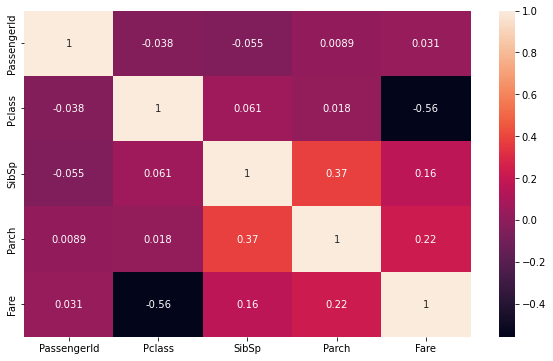

In [136]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Birbiriyle kuvvetli iliskili feauturemiz yok

In [142]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True) 

In [143]:
data['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [144]:
embarked_dummies = pd.get_dummies(data.Embarked)
data = pd.concat([data,embarked_dummies], axis=1)
data = data.drop("Embarked", axis=1)

sex_dummies= pd.get_dummies(data.Sex)
data = pd.concat([data,sex_dummies], axis=1)
data = data.drop("Sex", axis=1)

In [145]:
data.head()

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1


In [146]:
(data.shape)

(1309, 9)

In [147]:
new_train_data = data.iloc[:891,]
new_train_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,1,0,7.2500,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0
2,3,0,0,7.9250,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0
4,3,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,0,1,0,1
887,1,0,0,30.0000,0,0,1,1,0
888,3,1,2,23.4500,0,0,1,1,0
889,1,0,0,30.0000,1,0,0,0,1


In [148]:
new_test_data = data.iloc[891:,]
new_test_data

,Pclass,SibSp,Parch,Fare,C,Q,S,female,male
0,3,0,0,7.8292,0,1,0,0,1
1,3,1,0,7.0000,0,0,1,1,0
2,2,0,0,9.6875,0,1,0,0,1
3,3,0,0,8.6625,0,0,1,0,1
4,3,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0,0,1,0,1
414,1,0,0,108.9000,1,0,0,1,0
415,3,0,0,7.2500,0,0,1,0,1
416,3,0,0,8.0500,0,0,1,0,1


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train_data, target, random_state=11,test_size = 0.3)

# AdaBoosting Classifier

In [168]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [169]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [170]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state = 42)

In [171]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [172]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[152  24]
 [ 25  67]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       176
           1       0.74      0.73      0.73        92

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268


Train_Set
[[311  62]
 [ 62 188]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       373
           1       0.75      0.75      0.75       250

    accuracy                           0.80       623
   macro avg       0.79      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623



In [173]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.762468
test_precision    0.712485
test_recall       0.696000
test_f1           0.698767
dtype: float64

In [174]:
from sklearn.tree import plot_tree

In [175]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [244]:
features = list(new_train_data.columns)
targets = data["Survived"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=new_train_data.columns, class_names=targets.unique())

KeyError: 'Survived'

In [224]:
model.estimator_errors_

AttributeError: 'XGBClassifier' object has no attribute 'estimator_errors_'

In [225]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

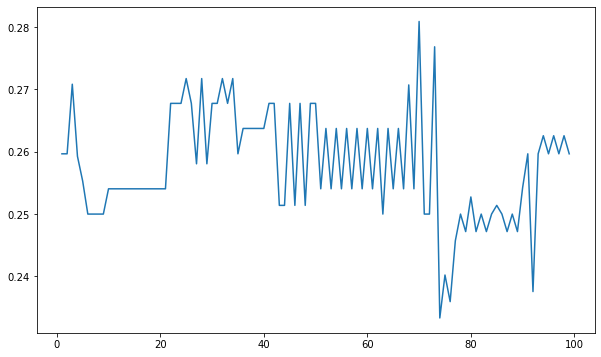

In [238]:
plt.plot(range(1,100), error_rates);

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
model = AdaBoostClassifier(random_state=42)

In [241]:
param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [245]:
ada_grid_model = GridSearchCV(model, param_grid, cv = 5, scoring = "f1")

In [246]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             scoring='f1')

In [ ]:
ada_grid_model.best_params_

In [ ]:
ada_grid_model.best_score_

In [232]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[156  20]
 [ 25  67]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       176
           1       0.77      0.73      0.75        92

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268


Train_Set
[[315  58]
 [ 64 186]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       373
           1       0.76      0.74      0.75       250

    accuracy                           0.80       623
   macro avg       0.80      0.79      0.80       623
weighted avg       0.80      0.80      0.80       623



In [237]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=data.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Q,0.00
S,0.00
Parch,0.02
C,0.02
Pclass,0.07
male,0.13
SibSp,0.14
female,0.17
Fare,0.45


In [234]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

NameError: name 'ada_imp_feats' is not defined

<Figure size 864x432 with 0 Axes>

In [235]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

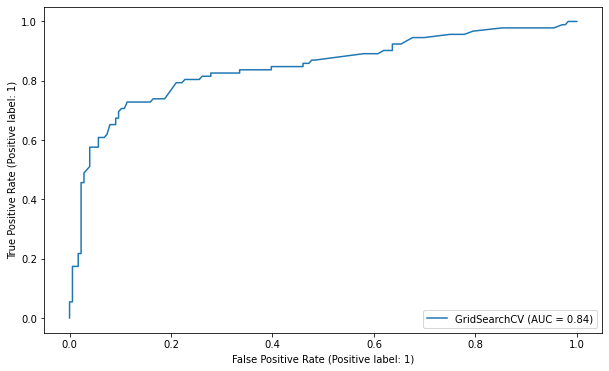

In [236]:
plot_roc_curve(ada_grid_model, X_test, y_test);

# GradientBoosting Classifier

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

In [248]:
grad_model = GradientBoostingClassifier(random_state=42)

In [249]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [250]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[161  15]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       176
           1       0.80      0.65      0.72        92

    accuracy                           0.82       268
   macro avg       0.82      0.78      0.80       268
weighted avg       0.82      0.82      0.82       268


Train_Set
[[357  16]
 [ 59 191]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       373
           1       0.92      0.76      0.84       250

    accuracy                           0.88       623
   macro avg       0.89      0.86      0.87       623
weighted avg       0.88      0.88      0.88       623



In [251]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.828162
test_precision    0.873547
test_recall       0.688000
test_f1           0.757774
test_roc_auc      0.855896
dtype: float64

In [252]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]},

In [253]:
gb_model = GradientBoostingClassifier(random_state=42)

In [254]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose = 2, n_jobs= -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [255]:
grid.best_params_

{'max_features': 4, 'n_estimators': 200, 'subsample': 1}

In [256]:
grid.best_score_

0.7555721166609779

In [257]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[159  17]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       176
           1       0.78      0.67      0.73        92

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268


Train_Set
[[358  15]
 [ 49 201]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       373
           1       0.93      0.80      0.86       250

    accuracy                           0.90       623
   macro avg       0.91      0.88      0.89       623
weighted avg       0.90      0.90      0.90       623



In [259]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=data.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Q,0.017558
C,0.019200
S,0.035277
Parch,0.064307
SibSp,0.071747
female,0.129269
Pclass,0.141569
male,0.236975
Fare,0.284098


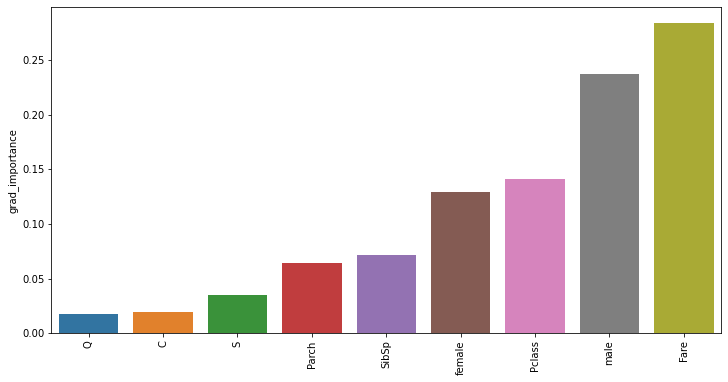

In [260]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

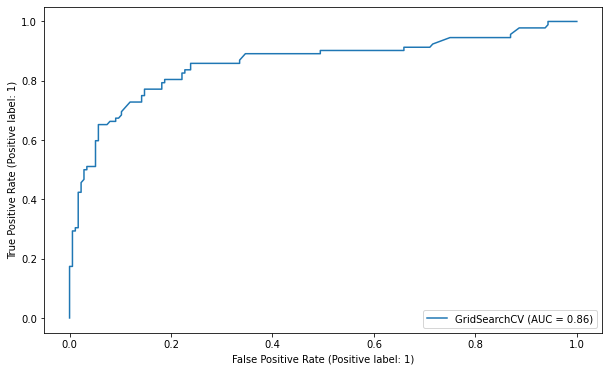

In [261]:
plot_roc_curve(grid, X_test, y_test);

# XGBoosting Classifier

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
from xgboost import XGBClassifier

In [198]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [199]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[159  17]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       176
           1       0.79      0.70      0.74        92

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268


Train_Set
[[359  14]
 [ 37 213]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       373
           1       0.94      0.85      0.89       250

    accuracy                           0.92       623
   macro avg       0.92      0.91      0.91       623
weighted avg       0.92      0.92      0.92       623



In [200]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.796262
test_precision    0.776773
test_recall       0.708000
test_f1           0.734524
test_roc_auc      0.846430
dtype: float64

In [201]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [202]:
xgb_model = XGBClassifier(random_state=42)

In [203]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [204]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.5}

In [205]:
xgb_grid.best_score_

0.7620488814669303

In [206]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[156  20]
 [ 25  67]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       176
           1       0.77      0.73      0.75        92

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268


Train_Set
[[351  22]
 [ 44 206]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       373
           1       0.90      0.82      0.86       250

    accuracy                           0.89       623
   macro avg       0.90      0.88      0.89       623
weighted avg       0.89      0.89      0.89       623



In [214]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=data.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
C,0.045402
Q,0.046976
S,0.048280
Parch,0.050106
SibSp,0.052115
Fare,0.086076
Pclass,0.111925
male,0.151065
female,0.408055


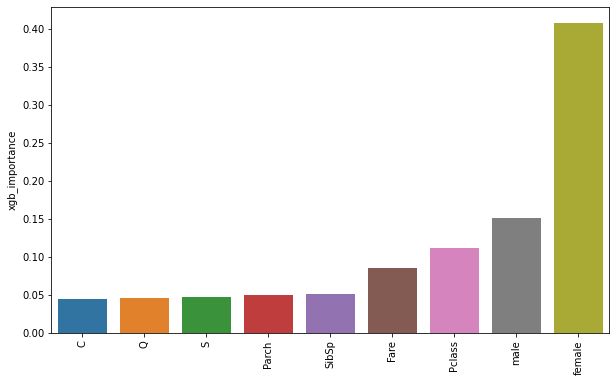

In [215]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

In [212]:
#pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

In [217]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

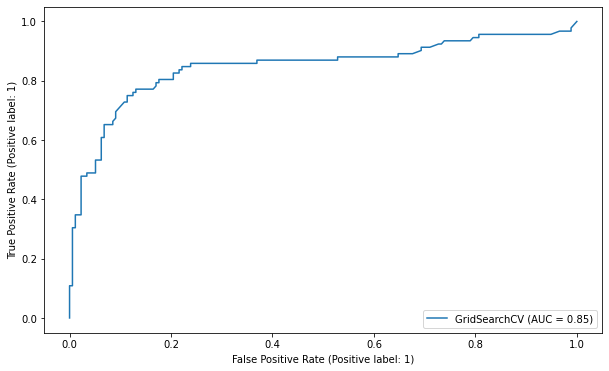

In [218]:
plot_roc_curve(xgb_grid, X_test, y_test);

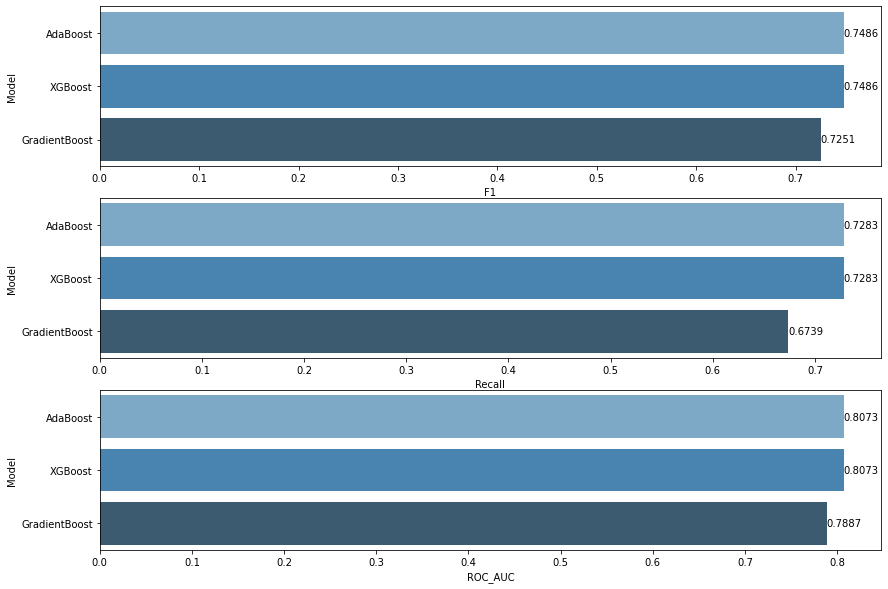

In [263]:
compare = pd.DataFrame({"Model": ["AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [ ada_f1, gb_f1, xgb_f1],
                        "Recall": [ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [ ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.4f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

CONCLUSION

In [ ]:
Adaboost ve XGBoost modellerinin recall F1 ROCAUC degerleri ayni cikmistir. Ayrintili diger degerlerine bakildiginda (Hata toplamlarina)XGBoost un daha iyi degerler verdigini gordum.XGBoost modelini tercih ederdim.